Oryginalny arkusz z wynikami ankiety, można znaleźć tutaj:
https://docs.google.com/spreadsheets/d/1bJPAH7kzXUK1vGirmWJxJCtGDpN8EHejeKcczane2YQ/edit#gid=535107018

Historycznie w wyszukiwarce allegro działa mechanizm fallbacku na indeks opisów. Jeżeli nie mamy wyników w głównym indeksie, szukamy w indeksie opisów. Wyniki te są przeważnie niższej jakości, ale funkcja ta była przydatna dla osób które szukały np. po numerach seryjnych, które sprzedawcy umieszczali tylko w opisie. 

Chcieliśmy sprawdzić jak użytkownicy oceniają jakość wyników wyszukiwania "po fallbacku". Żeby to sprawdzić umieściliśmy na listingu ankietę. W ankiecie użytkownicy mogli dać ocenę od 1 do 5. Dla ocen negatywnych (ponizej 3) mogli również napisać nam kilka miłych zdań. 

Celem badania było stworzenie modelu, który miał nam pomóc podjąć decyzje czy warto robić fallback czy nie? Notebook ten zawiera analize danych otrzymanych z ankiety i próbe stworzenia modelu, który podejmie decyzje czy warto robić fallback czy lepiej pokazać pustą stronę.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import url_helpers as helpers
%matplotlib inline

In [17]:
desc_fallback = pd.read_csv('items_desc_pl/items_desc_pl.csv')

In [18]:
desc_fallback

,mood,Pytanie_otwarte,URL,Device type,System,Browser,Unnamed: 6,Unnamed: 7,oceny,wystąpień,% odpowiedzi,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Desktop,Telefon,Tablet,Nieznane
0,1,dokładniejsze wyszukiwanie i likwidacja oszoło...,https://allegro.pl/drukarki-i-skanery-4578?str...,Desktop,Win7,Firefox 52.0,NaN,NaN,1,893.0,24%,średnia,2.98,NaN,1,774.0,39.0,78.0,2.0
1,1,NaN,https://allegro.pl/listing?string=rama%2015%20...,Desktop,WinXP,Firefox 52.0,NaN,NaN,2,538.0,14%,mediana,3,NaN,2,338.0,150.0,50.0,0.0
2,1,NaN,https://allegro.pl/listing?string=skuter%20tr%...,Desktop,Win8.1,Chrome 57.0.2987.133,NaN,NaN,3,499.0,13%,dominanta,#NAME?,NaN,3,365.0,78.0,56.0,0.0
3,1,Musialo by mi się wyświetlić to czego szukałam..,https://allegro.pl/listing?string=White%20Perm...,Desktop,Win7,Chrome 57.0.2987.133,NaN,NaN,4,1327.0,36%,NaN,NaN,NaN,4,984.0,237.0,105.0,1.0
4,1,NaN,https://allegro.pl/listing?string=dlugosc%20pa...,Desktop,Win7,Opera 43.0.2442.1144,NaN,NaN,5,455.0,12%,NaN,NaN,NaN,5,315.0,99.0,41.0,0.0
5,1,"Niestety widzę tylko łysa głowę,https://allegr...",https://allegro.pl/listing?string=sweethomedec...,Desktop,Win10,Chrome 57.0.2987.133,NaN,NaN,razem,3712.0,NaN,NaN,NaN,NaN,razem,2776.0,603.0,330.0,3.0
6,1,NaN,https://allegro.pl/odziez-meska-1455?string=bl...,Desktop,Win8.1,Chrome 57.0.2987.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,musiałabym znaleźć towar,https://allegro.pl/odziez-meska-1455?string=bl...,Desktop,Win7,IE 11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,Lepsza trafność.,https://allegro.pl/listing?string=redukcja%20c...,Desktop,Win8.1,Firefox 45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,znalezienie tego czego szukałem a nie innych r...,https://allegro.pl/listing?string=kluczyk%20do...,Desktop,Win7,Opera 31.0.1889.230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Ćwiczenie**

Usuń duplikaty w pierwszym przebiegu nie bierzemy ich pod uwagę. 

Wynikowy dataframe powinien zawierać dwie serie 'mood' i 'URL'.

In [19]:
desc_feedback = desc_fallback[['mood', 'URL']].drop_duplicates()
desc_feedback

,mood,URL
0,1,https://allegro.pl/drukarki-i-skanery-4578?str...
1,1,https://allegro.pl/listing?string=rama%2015%20...
2,1,https://allegro.pl/listing?string=skuter%20tr%...
3,1,https://allegro.pl/listing?string=White%20Perm...
4,1,https://allegro.pl/listing?string=dlugosc%20pa...
5,1,https://allegro.pl/listing?string=sweethomedec...
6,1,https://allegro.pl/odziez-meska-1455?string=bl...
8,1,https://allegro.pl/listing?string=redukcja%20c...
9,1,https://allegro.pl/listing?string=kluczyk%20do...
10,1,https://allegro.pl/listing?string=farba%20moto...


** Wzbogacanie i czyszczenie **

Z urli możemy wyciągnąć kilka dodatkowych informacji np. nazwa scenariusza które następnie zamienimy na dane numeryczne z których spróbujemy stworzyć model ML.

**Czym jest scenariusz wyszukiwania?**

Scenariusz wyszukiwania jest przydzielany na podstawie frazy bądź wskazanej wprost kategorii. Na podstawie tego do jakiej kategorii użytkownicy najczęściej wchodzili na daną frazę, dobieramy departament z którym związana jest fraza. W przypadku braku wskazania lub konfliktu przydziału wybierany jest scenariusz uni. 

**helpers**

helpers to dodatkowy modul zawierający funkcje pozwalające sparsować zawartość urla listingowego. Odpytujący się usługi kategorii i parsujący (dla uproszczenia wpisane tam są na stałe adresy instancji).

In [20]:
def get_department(url):
    category_alias, phrase, department = helpers.clean_url(url)
    return department 

def get_phrase(url):
    category_alias, phrase, department = helpers.clean_url(url)
    return phrase
    
def get_phrase_lenght(url):
    category_alias, phrase, department = helpers.clean_url(url)
    return len(phrase)

def get_category_alias(url):
    category_alias, phrase, department = helpers.clean_url(url)
    return category_alias

def classify_mood(mood):
    if mood == 5 or mood == 4:
        return 1
    return 0

def contains_quot(phrase):
    if '"' in phrase:
        return 1
    return 0

def is_query_from_main(category_alias):
    if category_alias == "0":
        return 1
    return 0

df = desc_feedback.copy()
df['department'] = desc_feedback['URL'].map(get_department)
df['phrase'] = desc_feedback['URL'].map(get_phrase)
df['phrase_lenght'] = desc_feedback['URL'].map(get_phrase_lenght)
df['category_alias'] = desc_feedback['URL'].map(get_category_alias)
df['phrase_lenght'] = df['phrase'].map(lambda phrase: len(phrase))
df['has_quotation'] = df['phrase'].map(contains_quot)
df['no_of_words'] = df['phrase'].map(lambda phrase: len(phrase.split()))
df['should_fallback'] = df['mood'].map(classify_mood)
df['query_from_main'] = df['category_alias'].map(is_query_from_main)

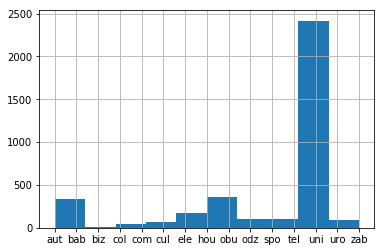

In [21]:
df['department'].hist()

Zobaczmy jakie zapytania wpadają do scenariusza uniwersalnego (uni).

In [9]:
onlygood = df.query('should_fallback == 0')
onlygood[onlygood['department'] == 'uni']['phrase']

1                                      rama 15 x 21 szkło
2                             skuter trójkołowy spalinowy
3                                  White Permanent Marker
4                   dlugosc paska klinowy renault  megane
8                                          redukcja cu 42
9                         kluczyk do dystrybutora papieru
10                           farba motocyklowa czarny mat
12             pistolet na kulki broń z laserem i latarką
13                     koła zamienne do rowerka biegowego
14                                            Tunel termo
15                                    KÓŁKO PŁYWAJĄCE 142
16                                  astra g 1999 1,8 16 v
18      Polsko, uwierz w swoją wielkość. Głos biskupów...
19                                   wodne triki koraliki
20                                      body rozpinane 78
21                                      opierzenie komina
22                          sciemniacz do swiatla na 220v
24            

Skupmy się przez chwilę na zapytaniach z głównej strony allegro.

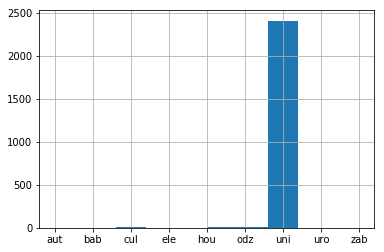

In [10]:
df[df['category_alias'] == "0"]['department'].hist()

Wygląda na to, że miażdząca większość zapytań z fallbackiem to zapytania zakwalifikowane jako uni.

In [2]:
df['department'].unique()

NameError: name 'df' is not defined

One hot encoding to metoda pozwalająca zakodować zmienne kategeoryczne (enumy) w formie zero jedynkowej. Jest to szczególnie istotne gdy pracujemy z prostymi modelami liniowymi (np. regresja liniowa) **wiesz dlaczego to takie ważne?** 

**Jak zakodowałbyś godzinę aby dało się ją uwzględnić w modelu opartym o regresje liniową?**

http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

Do implementacji one-hot-encoding w pandas używa się funkcji get_dummies.

In [12]:
df = pd.concat([df, pd.get_dummies(df['department'], prefix="depar")], axis=1)
df

,mood,URL,department,phrase,phrase_lenght,category_alias,has_quotation,no_of_words,should_fallback,query_from_main,...,depar_cul,depar_ele,depar_hou,depar_obu,depar_odz,depar_spo,depar_tel,depar_uni,depar_uro,depar_zab
0,1,https://allegro.pl/drukarki-i-skanery-4578?str...,ele,proszek do tonera drukarki laserowej hp,39,drukarki-i-skanery-4578,0,6,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,https://allegro.pl/listing?string=rama%2015%20...,uni,rama 15 x 21 szkło,18,0,0,5,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,https://allegro.pl/listing?string=skuter%20tr%...,uni,skuter trójkołowy spalinowy,27,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,https://allegro.pl/listing?string=White%20Perm...,uni,White Permanent Marker,22,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,https://allegro.pl/listing?string=dlugosc%20pa...,uni,dlugosc paska klinowy renault megane,37,0,0,5,0,1,...,0,0,0,0,0,0,0,1,0,0
5,1,https://allegro.pl/listing?string=sweethomedec...,odz,sweethomedecor,14,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
6,1,https://allegro.pl/odziez-meska-1455?string=bl...,odz,bluza francuski w paski,23,odziez-meska-1455,0,4,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1,https://allegro.pl/listing?string=redukcja%20c...,uni,redukcja cu 42,14,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
9,1,https://allegro.pl/listing?string=kluczyk%20do...,uni,kluczyk do dystrybutora papieru,31,0,0,4,0,1,...,0,0,0,0,0,0,0,1,0,0
10,1,https://allegro.pl/listing?string=farba%20moto...,uni,farba motocyklowa czarny mat,28,0,0,4,0,1,...,0,0,0,0,0,0,0,1,0,0


In [13]:
# list all columns
df.columns

Index(['mood', 'URL', 'department', 'phrase', 'phrase_lenght',
       'category_alias', 'has_quotation', 'no_of_words', 'should_fallback',
       'query_from_main', 'depar_aut', 'depar_bab', 'depar_biz', 'depar_col',
       'depar_com', 'depar_cul', 'depar_ele', 'depar_hou', 'depar_obu',
       'depar_odz', 'depar_spo', 'depar_tel', 'depar_uni', 'depar_uro',
       'depar_zab'],
      dtype='object')

Być może warto wzbogacić nasz zbiór o informacje, które są już dostępne po wykonaniu zapytania, ale przed wyświetleniem wyników - liczbę rezultatów. Wzbogacamy więc nasz data frame o takie dane.

In [14]:
results_count = pd.read_csv('items_desc_pl/results_count_items_desc_pl.csv')
len(results_count)

3705

In [16]:
df_with_results = pd.merge(df, results_count, on="URL")
len(df_with_results)

3707

In [17]:
df_with_results['results_count'].describe()

count      3707.000000
mean       2048.346641
std       20503.175356
min           0.000000
25%          16.000000
50%          86.000000
75%         479.500000
max      933414.000000
Name: results_count, dtype: float64

Zobaczmy jak wyglada histogram rozlozenia wartosci w results count.

In [18]:
#df_with_results.query('results_count < 5000')['results_count'].hist()

Jest spore rozrzucenie i skrzywienie na korzyść dużych listingów. Może jest tak, że bardziej interesujące w kontekście podjęcia decyzji są listingi krótki. Zakodujmy liczbę jako własność kategoryczną technika ta nazywa się bucketyzacją.

**Bucketyzacja**

Klasyfikujemy wartości liczbowe i mapujemy je na określony zbiór klas. Dobór przedziałów może być zrealizowany na podstawie kwantyli (p50, p75...) lub... ekspercko ;-)

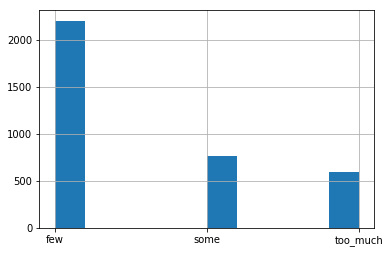

In [19]:
# bucketize results_count in the expert way
max_results_count = df_with_results['results_count'].max()
results_categories = pd.cut(df_with_results['results_count'], 
                            bins = [0, 200, 1000, max_results_count],
                            labels = ['few', 'some', 'too_much'])
results_categories.hist()

** Ćwiczenie **

Również w tym przypadku dla wartości kategorycznych stosujemy one-hot-encoding. Przygotuj dataframe zawierający one-hot-encoding dla results_categories, stosując dla kolumn prefix "results_count".

In [20]:
result_set_categorical = pd.get_dummies(results_categories, prefix="results_count")
result_set_categorical

,results_count_few,results_count_some,results_count_too_much
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,1,0,0
9,1,0,0


In [21]:
df_with_results_categorical = pd.concat([df_with_results, result_set_categorical], axis=1)
df_with_results_categorical = df_with_results_categorical.query("department == 'uni'").query("category_alias == '0'")

**groupby** pozwoli nam podejrzeć jak wyglądają przykładowe rekordy dla różnych typów obserwacji.

In [22]:
df_with_results_categorical.groupby(['mood']).head()

,mood,URL,department,phrase,phrase_lenght,category_alias,has_quotation,no_of_words,should_fallback,query_from_main,...,depar_odz,depar_spo,depar_tel,depar_uni,depar_uro,depar_zab,results_count,results_count_few,results_count_some,results_count_too_much
1,1,https://allegro.pl/listing?string=rama%2015%20...,uni,rama 15 x 21 szkło,18,0,0,5,0,1,...,0,0,0,1,0,0,6681.0,0,0,1
2,1,https://allegro.pl/listing?string=skuter%20tr%...,uni,skuter trójkołowy spalinowy,27,0,0,3,0,1,...,0,0,0,1,0,0,7.0,1,0,0
3,1,https://allegro.pl/listing?string=White%20Perm...,uni,White Permanent Marker,22,0,0,3,0,1,...,0,0,0,1,0,0,15.0,1,0,0
4,1,https://allegro.pl/listing?string=dlugosc%20pa...,uni,dlugosc paska klinowy renault megane,37,0,0,5,0,1,...,0,0,0,1,0,0,724.0,0,1,0
7,1,https://allegro.pl/listing?string=redukcja%20c...,uni,redukcja cu 42,14,0,0,3,0,1,...,0,0,0,1,0,0,825.0,0,1,0
540,3,https://allegro.pl/listing?string=lol%20surpri...,uni,lol surprise,12,0,0,2,0,1,...,0,0,0,1,0,0,186.0,1,0,0
894,2,https://allegro.pl/listing?string=KLAPKA%20BAT...,uni,KLAPKA BATERII OBUDOWA TYLNA LUMIA 610 ORYGINA...,50,0,0,8,0,1,...,0,0,0,1,0,0,0.0,0,0,0
896,2,https://allegro.pl/listing?string=06b%20109%20...,uni,06b 109 217 b,13,0,0,4,0,1,...,0,0,0,1,0,0,8911.0,0,0,1
898,2,https://allegro.pl/listing?string=waza%20krzys...,uni,waza krzysztof daphne,21,0,0,3,0,1,...,0,0,0,1,0,0,32.0,1,0,0
899,2,https://allegro.pl/listing?string=przeguby%20w...,uni,"przeguby wewnętrzne vw golf IV 1,6B",35,0,0,6,0,1,...,0,0,0,1,0,0,21.0,1,0,0


In [24]:
feature_cols = ['has_quotation', 'phrase_lenght','no_of_words', 
                'depar_aut', 'depar_bab', 'depar_biz', 'depar_col', 'depar_com', 'depar_cul',
       'depar_ele', 'depar_hou', 'depar_obu', 'depar_odz', 'depar_spo',
       'depar_tel', 'depar_uni', 'depar_uro', 'depar_zab', 
        'results_count_few' ,'results_count_some', 'results_count_too_much']
labels = ['should_fallback'] 

df = df_with_results_categorical

X = df[feature_cols]
Y = df['should_fallback']

In [25]:
import matplotlib.pyplot as plt

def plot_histograms(df_pos, df_neg, feature_cols):
  for col in feature_cols:
    fig, ax = plt.subplots()
    ax.hist(df_neg[col], color='blue', alpha=0.2, bins=20, normed=True)
    ax.hist(df_pos[col], color='red', alpha=0.5, bins=10, normed=True)

    ax.set(title=col)
    ax.margins(0.05)
    ax.set_ylim(bottom=0)
    plt.show() 

*** Ćwiczenie ***

Stwórz dwa dataframe'y jeden zawierający przykłady pozytywne (takie w których warto robić fallback) i negatywne (oceny są słabe, nie warto fallbackować). Wykorzystamy je żeby sprawdzić czy zebrane przez nas ficzery mogą nam pomóc podjąć decyzje której szukamy.

In [26]:
df_positive = # TBD
df_negative = # TBD

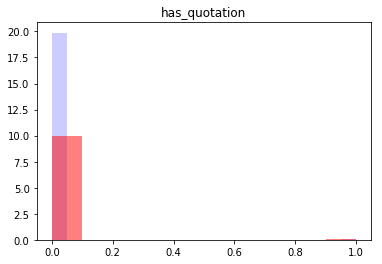

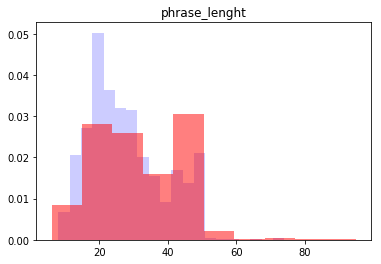

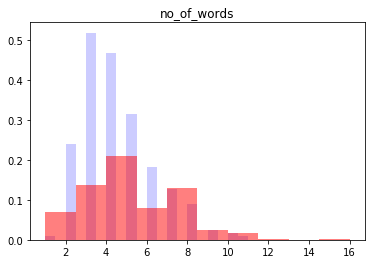

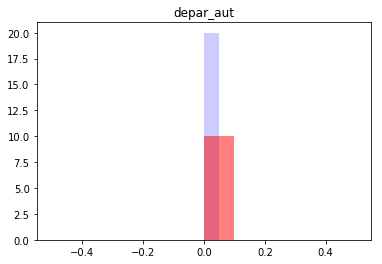

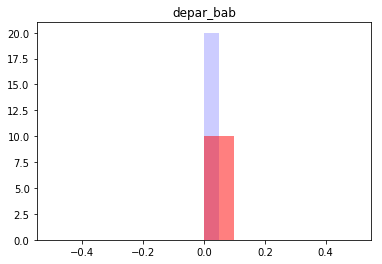

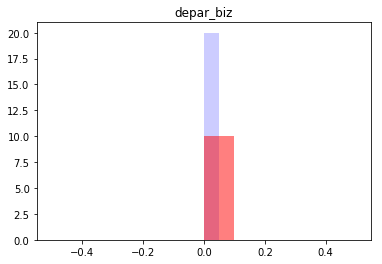

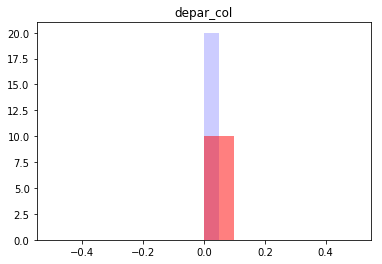

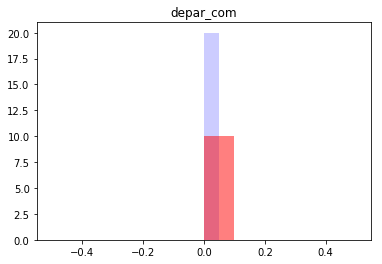

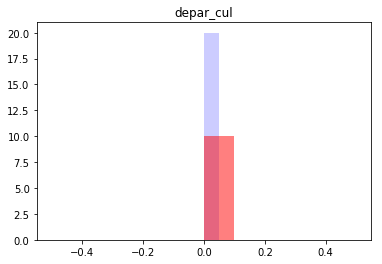

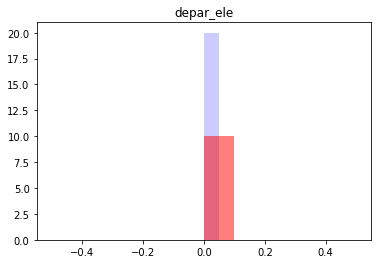

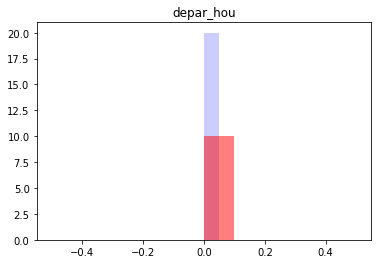

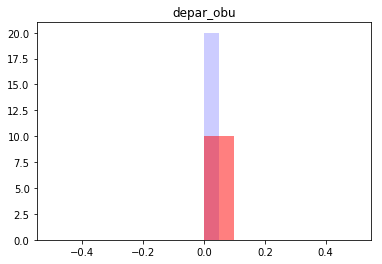

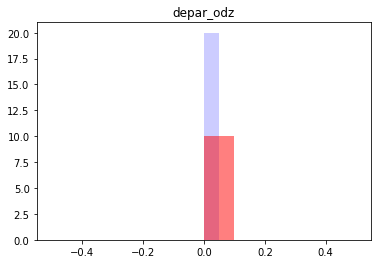

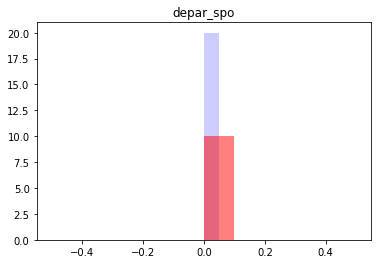

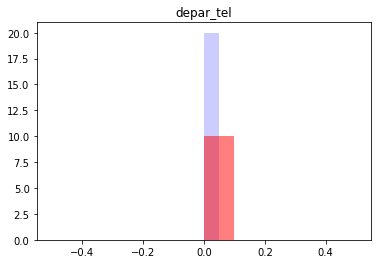

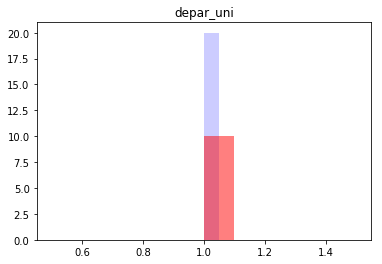

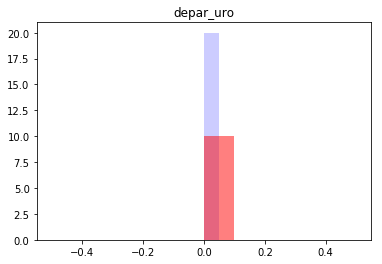

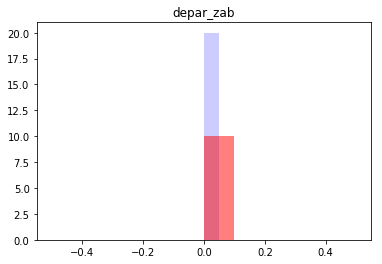

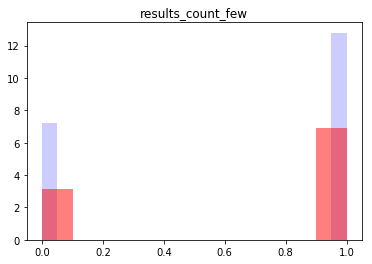

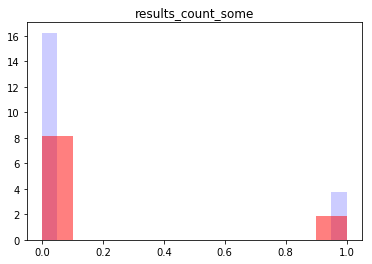

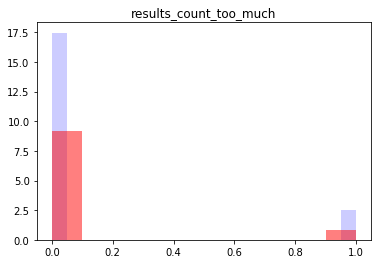

In [27]:
plot_histograms(df_positive, df_negative, feature_cols=feature_cols)

**Pandas profiling** to kombajn, które w przypadku danych, które mieszcza sie w pamieci potrafi je zanalizowac pod kątem zależności statystycznych. Strasznie pluje błędami, ale na końcu jest raport ;-)

In [28]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas_profiling/base.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/Cellar/python3/3.6.

Number of variables,30
Number of observations,2408
Total Missing (%),0.0%
Total size in memory,268.2 KiB
Average record size in memory,114.0 B
Numeric,9
Categorical,2
Date,0
Text (Unique),0
Rejected,19
Distinct count,2407


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Tworząc modele MLowe z reguły **zaczynamy z jakimś prostym modelem** np. regresja logistyczną. Regresja logistyczna zwraca wartość z przedziału od 0 do 1. Poniżej trenujemy klasyfikator i obliczamy accuracy za pomocą jednej z wbudowanych w sklearna funkcji.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression().fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
no_correct = accuracy_score(y_test, y_predicted, normalize=False)
no_of_test_samples = len(y_test)

print("accuracy: {}".format(accuracy))
print("no of correctly classified samples: {}".format(no_correct))
print("no of test samples: {}".format(no_of_test_samples))

accuracy: 0.5746887966804979
fraction of correctly classified samples: 277
no of test samples: 482


**Confusion matrix** to ważne narzędzie pozwalające ocenić jakiego rodzaju błędy popełnia nasz klasyfikator. W zależnosci od zastosowania różne rodzaje błędów mogą mięć różną wartość biznesową np. przy wykrywaniu raka chcielibyśmy raczej go wykryć (False Positive) niż przeoczyć (False Negative)

In [31]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predicted)
confusion

array([[205,  61],
       [144,  72]])

**Czy da się poprawić wynik uzyskany z tego modelu? Czego brakuje?**